In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

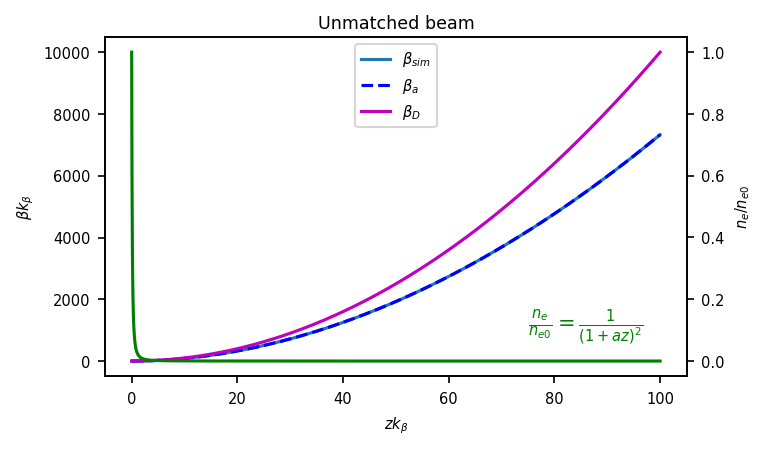

In [8]:
# Possible incoming beams for an adiabatic focuser
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 5
z = np.linspace(0, 100, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(z, (1+a*z)*(1+(1-np.cosh(np.log(1+a*z)*np.sqrt(1-4/a**2)))/(4/a**2-1)-
                     np.sinh(np.log(1+a*z)*np.sqrt(1-4/a**2))/np.sqrt(1-4/a**2)), 'b--')
plt.plot(z, z**2+1, 'm')
plt.title(r'Unmatched beam')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'$\beta_{sim}$', r'$\beta_a$', r'$\beta_D$'], loc=9)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(75, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1+az)^2}$', color='green', fontsize=10)
plt.ylim(-0.05, 1.05)
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.show()